In [65]:
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import re
import os
import itertools
import plot_styling
from jitter import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

plot_styling.setup('paper')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
matplotlib.rcParams['figure.dpi'] = 110

In [3]:
attention_maps = pd.read_pickle('../attention-maps-beoid-with-metadata.pickle')

In [4]:
attention_maps[(attention_maps.Network == 'Spatial') & (attention_maps['EBP Type'] == 'Non-Contrastive')].groupby('Clip').count().mean()

Attention Map    47.058065
Frame            47.058065
Network          47.058065
EBP Type         47.058065
Window Size      47.058065
Video frame      47.058065
Video            47.058065
Operator         47.058065
Location         47.058065
Object           47.058065
Action           47.058065
Type             47.058065
dtype: float64

In [5]:
jitter_df = attention_maps.groupby(['Network', 'EBP Type']).apply(jitter)
jitter_df.reset_index(drop=True, inplace=True)
jitter_df.groupby(['Network', 'EBP Type']).describe()

Frame       Jitter     Operator  \
Network  EBP Type                                                       
Spatial  Contrastive     count  7139.000000  7139.000000  7139.000000   
                         mean     35.292198    19.823331     4.643928   
                         std      33.602660    14.273030     1.908192   
                         min       1.000000     0.000000     0.000000   
                         25%      12.000000    10.094355     4.000000   
                         50%      25.000000    15.613314     5.000000   
                         75%      46.000000    24.823943     6.000000   
                         max     199.000000   122.226311     7.000000   
         Non-Contrastive count  7139.000000  7139.000000  7139.000000   
                         mean     35.292198    18.206277     4.643928   
                         std      33.602660    10.381023     1.908192   
                         min       1.000000     0.000000     0.000000   
                         25%      12.000000    11.941697     4.000000   
                         50%      25.000000    15.821854     5.000000   
                         75%      46.000000    21.254576     6.000000   
                         max     199.000000   115.312958     7.000000   
Temporal Contrastive     count  5744.000000  5744.000000  5744.000000   
                         mean     33.649025    24.655589     4.674965   
                         std      33.537540    16.658224     1.885277   
                         min       1.000000     0.693441     0.000000   
                         25%      10.000000    13.115419     4.000000   
                         50%      22.000000    20.926140     5.000000   
                         75%      45.000000    31.852257     6.000000   
                         max     190.000000   133.818726     7.000000   
         Non-Contrastive count  5744.000000  5744.000000  5744.000000   
                         mean     33.649025    17.201856     4.674965   
                         std      33.537540    10.579121     1.885277   
                         min       1.000000     1.103449     0.000000   
                         25%      10.000000     9.969189     4.000000   
                         50%      22.000000    14.958122     5.000000   
                         75%      45.000000    21.290998     6.000000   
                         max     190.000000   103.808922     7.000000   

                                Video frame  Window Size  
Network  EBP Type                                         
Spatial  Contrastive     count  7139.000000       7139.0  
                         mean   1326.939347          1.0  
                         std    1133.393266          0.0  
                         min      80.000000          1.0  
                         25%     467.000000          1.0  
                         50%     961.000000          1.0  
                         75%    1921.500000          1.0  
                         max    5035.000000          1.0  
         Non-Contrastive count  7139.000000       7139.0  
                         mean   1326.939347          1.0  
                         std    1133.393266          0.0  
                         min      80.000000          1.0  
                         25%     467.000000          1.0  
                         50%     961.000000          1.0  
                         75%    1921.500000          1.0  
                         max    5035.000000          1.0  
Temporal Contrastive     count  5744.000000       5744.0  
                         mean   1295.282033         10.0  
                         std    1132.639911          0.0  
                         min      80.000000         10.0  
                         25%     446.000000         10.0  
                         50%     919.000000         10.0  
                         75%    1912.000000         10.0  
                         max    5026.000000         10.0  
         Non-Contrast

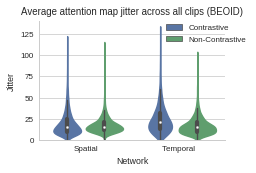

In [76]:
plt.figure(figsize=(3.5, 2.5))
sns.violinplot(x='Network', y='Jitter', hue='EBP Type', data=jitter_df, cut=0, bw=.2)
plt.ylim(0)
plt.title("Average attention map jitter across all clips (BEOID)")
sns.despine()
plt.legend(bbox_to_anchor=(1.15, 1.03))

plt.tight_layout()
plt.savefig('average-jitter-distribution-beoid.pdf')

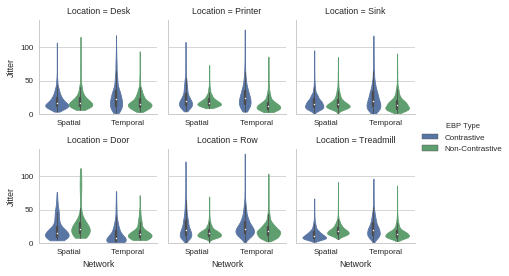

In [78]:
sns.set_context(rc = {'lines.linewidth': 1})

plt.figure(figsize=(6, 4))
sns.factorplot(y='Jitter', 
           x="Network",
           col="Location",
           hue='EBP Type',
           col_wrap=3,
           kind='violin',
           size=2,
           aspect=1,
           data=jitter_df,
           cut=0,
           sharex=False,
           linewidth=0.8,
          )
plt.subplots_adjust(top=0.90)
grid.fig.suptitle('Average attention map jitter across clip by location (BEOID)')
plt.ylim(0)
plt.savefig('average-jitter-distribution-beoid-by-location.pdf')

In [8]:
jitter_average_by_clip = jitter_df.groupby(['Network', 'EBP Type', 'Clip'])\
    .mean()\
    .reset_index()
    
idx_max = jitter_average_by_clip.groupby(['Network', 'EBP Type'])['Jitter'].idxmax()
idx_min = jitter_average_by_clip.groupby(['Network', 'EBP Type'])['Jitter'].idxmin()

display("min")
display(jitter_average_by_clip.iloc[idx_min])
display("max")
display(jitter_average_by_clip.iloc[idx_max])

'min'

,Network,EBP Type,Clip,Frame,Jitter,Operator,Video frame,Window Size
121,Spatial,Contrastive,06_Treadmill1_press_button_4469-4493,12.0,5.721366,6.0,4481.0,1.0
191,Spatial,Non-Contrastive,03_Sink2_stir_spoon_1793-1887,47.0,9.770130,3.0,1840.0,1.0
357,Temporal,Contrastive,04_Sink1_press_button_800-835,13.0,3.604013,4.0,813.0,10.0
480,Temporal,Non-Contrastive,01_Sink2_press_button_527-561,12.5,4.157825,1.0,539.5,10.0


'max'

,Network,EBP Type,Clip,Frame,Jitter,Operator,Video frame,Window Size
62,Spatial,Contrastive,05_Row1_pull_rowing-machine_2751-2784,16.5,46.439333,5.0,2767.5,1.0
183,Spatial,Non-Contrastive,02_Sink2_pick-up_jar_1003-1027,12.0,42.769578,2.0,1015.0,1.0
336,Temporal,Contrastive,02_Sink1_scoop_spoon_1294-1332,14.5,53.819462,2.0,1308.5,10.0
478,Temporal,Non-Contrastive,01_Sink1_turn_tap_406-441,13.0,39.741092,1.0,419.0,10.0


In [9]:
jitter_average_by_clip.sort_values(by=['Network', 'EBP Type', 'Jitter']).groupby(['Network', 'EBP Type']).head(2)

,Network,EBP Type,Clip,Frame,Jitter,Operator,Video frame,Window Size
121,Spatial,Contrastive,06_Treadmill1_press_button_4469-4493,12.0,5.721366,6.0,4481.0,1.0
148,Spatial,Contrastive,07_Treadmill1_press_button_193-305,56.0,6.748894,7.0,249.0,1.0
191,Spatial,Non-Contrastive,03_Sink2_stir_spoon_1793-1887,47.0,9.770130,3.0,1840.0,1.0
293,Spatial,Non-Contrastive,07_Row2_push_rowing-machine_844-904,30.0,10.742081,7.0,874.0,1.0
357,Temporal,Contrastive,04_Sink1_press_button_800-835,13.0,3.604013,4.0,813.0,10.0
353,Temporal,Contrastive,04_Door2_open_door_284-333,20.0,4.285123,4.0,304.0,10.0
480,Temporal,Non-Contrastive,01_Sink2_press_button_527-561,12.5,4.157825,1.0,539.5,10.0
511,Temporal,Non-Contrastive,04_Sink1_press_button_800-835,13.0,4.676465,4.0,813.0,10.0


In [10]:
jitter_average_by_clip.sort_values(by=['Network', 'EBP Type', 'Jitter'], ascending=[True, True, False]).groupby(['Network', 'EBP Type']).head(2)

,Network,EBP Type,Clip,Frame,Jitter,Operator,Video frame,Window Size
62,Spatial,Contrastive,05_Row1_pull_rowing-machine_2751-2784,16.5,46.439333,5.0,2767.5,1.0
73,Spatial,Contrastive,05_Row2_pull_rowing-machine_2030-2060,15.0,46.302898,5.0,2045.0,1.0
183,Spatial,Non-Contrastive,02_Sink2_pick-up_jar_1003-1027,12.0,42.769578,2.0,1015.0,1.0
164,Spatial,Non-Contrastive,01_Desk2_pick-up_tape_957-998,20.5,40.892877,1.0,977.5,1.0
336,Temporal,Contrastive,02_Sink1_scoop_spoon_1294-1332,14.5,53.819462,2.0,1308.5,10.0
315,Temporal,Contrastive,00_Sink1_turn_tap_694-717,7.0,53.438853,0.0,701.0,10.0
478,Temporal,Non-Contrastive,01_Sink1_turn_tap_406-441,13.0,39.741092,1.0,419.0,10.0
574,Temporal,Non-Contrastive,06_Row2_pull_rowing-machine_613-641,9.5,34.513797,6.0,622.5,10.0
